In [46]:
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

<h2>Step 1: Data Preparation</h2>

In [47]:
# Read and load the data into a Pandas data frame and output its size
df = pd.read_csv("covid19dataexport.csv", low_memory=False)
df.shape

(108469, 7)

In [48]:
# Output the first 5 rows
df.head()

,Unnamed: 0,Date reported,Alberta Health Services Zone,Gender,Age group,Case status,Case type
0,1,2020-10-13,Edmonton Zone,Male,40-49 years,Recovered,Confirmed
1,2,2020-11-08,Calgary Zone,Male,10-19 years,Recovered,Confirmed
2,3,2020-10-13,South Zone,Male,5-9 years,Recovered,Confirmed
3,4,2020-11-25,Calgary Zone,Female,80+ years,Recovered,Confirmed
4,5,2020-11-26,Central Zone,Female,80+ years,Recovered,Confirmed


In [49]:
# Show the last 5 rows
df.tail()

,Unnamed: 0,Date reported,Alberta Health Services Zone,Gender,Age group,Case status,Case type
108464,108465,2020-12-17,North Zone,Male,1-4 years,Recovered,Confirmed
108465,108466,2020-12-28,Calgary Zone,Female,30-39 years,Active,Confirmed
108466,108467,2020-12-28,Edmonton Zone,Female,50-59 years,Active,Confirmed
108467,108468,2020-12-05,Central Zone,Male,30-39 years,Recovered,Confirmed
108468,108469,2020-11-21,Calgary Zone,Female,10-19 years,Recovered,Confirmed


<h2>Step 2: Exploratory Data Analysis</h2>

In [50]:
# Get the earliest date
min(df['Date reported'])

'2020-03-06'

In [51]:
# Get the latest date
max(df['Date reported'])

'2021-01-06'

In [52]:
# Total confirmed cases
sum(df['Case type'] != "Confirmed")

1849

In [53]:
# Display summary statistics
df.describe(include='all')

,Unnamed: 0,Date reported,Alberta Health Services Zone,Gender,Age group,Case status,Case type
count,108469.000000,108469,108469,108469,108469,108469,108469
unique,NaN,305,6,3,12,3,2
top,NaN,2020-12-04,Edmonton Zone,Male,30-39 years,Recovered,Confirmed
freq,NaN,1876,46386,54241,20750,93954,106620
mean,54235.000000,NaN,NaN,NaN,NaN,NaN,NaN
std,31312.447512,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,27118.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,54235.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,81352.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Show column data types
df.dtypes

Unnamed: 0                       int64
Date reported                   object
Alberta Health Services Zone    object
Gender                          object
Age group                       object
Case status                     object
Case type                       object
dtype: object

In [55]:
# Rename column to easily identifiable names
df = df.rename(columns={"Unnamed: 0": "ID", "Alberta Health Services Zone": "AHS Zone", "Gender": "Gender", "Age group": "Age", "Case status": "Status","Case type ": "Type"})
df.head(5)

,ID,Date reported,AHS Zone,Gender,Age,Status,Case type
0,1,2020-10-13,Edmonton Zone,Male,40-49 years,Recovered,Confirmed
1,2,2020-11-08,Calgary Zone,Male,10-19 years,Recovered,Confirmed
2,3,2020-10-13,South Zone,Male,5-9 years,Recovered,Confirmed
3,4,2020-11-25,Calgary Zone,Female,80+ years,Recovered,Confirmed
4,5,2020-11-26,Central Zone,Female,80+ years,Recovered,Confirmed


In [56]:
# Find the no. of duplicate rows in the dataset
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [57]:
#df = df.drop_duplicates() # Drop duplicates

# Show column counts
df.count()

ID               108469
Date reported    108469
AHS Zone         108469
Gender           108469
Age              108469
Status           108469
Case type        108469
dtype: int64

In [58]:
#dc_df['DUI'] = dc_df['DUI'].replace('0','N') # Replace 0s with 'N'
#dc_df['DUI'] = dc_df['DUI'].fillna('N') # Replace null values with 'N'

# Check no. of nulls in each column
print(df.isnull().sum())

ID               0
Date reported    0
AHS Zone         0
Gender           0
Age              0
Status           0
Case type        0
dtype: int64


In [59]:
#dc_df = dc_df[~dc_df['StateCode'].isnull()] # Get rid of nulls

# Plot Severity by AddressType
#plt.figure(figsize=(20,5))
#sns.boxplot(x=df['AddressType'], y=df['Severity'])

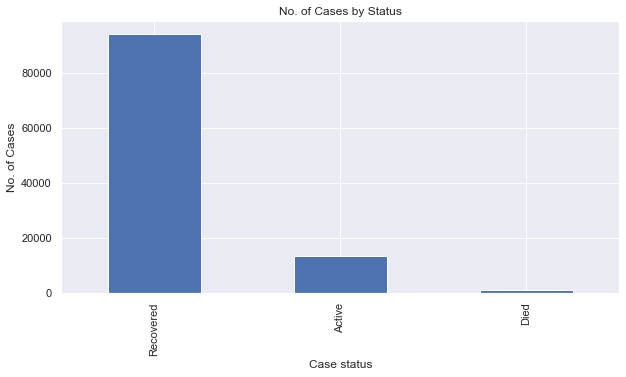

In [60]:
# Plot No. of Cases by Case status
df['Status'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("No. of Cases by Status")
plt.ylabel('No. of Cases')
plt.xlabel('Case status');

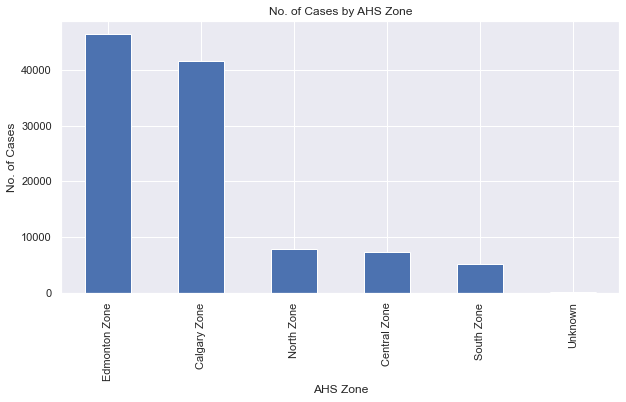

In [61]:
# Plot No. of Cases by Zones
df['AHS Zone'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("No. of Cases by AHS Zone")
plt.ylabel('No. of Cases')
plt.xlabel('AHS Zone');

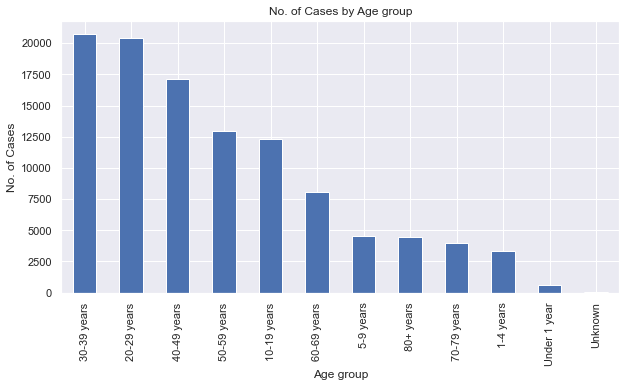

In [69]:
# Plot No. of Cases by Age groups
df['Age'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("No. of Cases by Age group")
plt.ylabel('No. of Cases')
plt.xlabel('Age group');

In [70]:
# Convert to datetime field
df['Date reported'] = df['Date reported'].astype("datetime64")

In [71]:
df_rec = df.loc[df['Status'] == 2]

In [72]:
print(df_rec['Date reported'])

Series([], Name: Date reported, dtype: datetime64[ns])


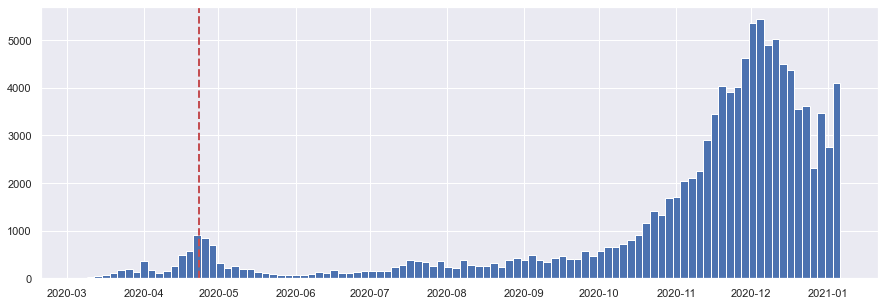

In [73]:
# Plot histogram over reported date period. The dashed red line is a sample reference date.
import datetime as dt
plt.figure(figsize=(15,5))
plt.hist(df['Date reported'], bins=100);
plt.axvline(x=dt.datetime(2020, 4, 23), color='r', linestyle='dashed', linewidth=2)

In [74]:
# Get counts for each age group (category)
df['Age'].value_counts()

30-39 years     20750
20-29 years     20383
40-49 years     17160
50-59 years     12926
10-19 years     12315
60-69 years      8064
5-9 years        4540
80+ years        4443
70-79 years      3968
1-4 years        3301
Under 1 year      589
Unknown            30
Name: Age, dtype: int64

In [75]:
# Map each age group to a numeric variable
from sklearn import preprocessing
Age = preprocessing.LabelEncoder()
Age.fit(['30-39 years', '20-29 years', '40-49 years', '50-59 years', '10-19 years', '60-69 years', '5-9 years', '80+ years', '70-79 years', '1-4 years', 'Under 1 year', 'Unknown'])
df['Age'] = Age.transform(df['Age'])

In [76]:
# Check the maped categories along with their counts
df['Age'].value_counts()

3     20750
2     20383
4     17160
6     12926
1     12315
7      8064
5      4540
9      4443
8      3968
0      3301
10      589
11       30
Name: Age, dtype: int64

In [77]:
# Get category counts for gender feature
df['Gender'].value_counts()

Male       54241
Female     54185
Unknown       43
Name: Gender, dtype: int64

In [78]:
# Map each gender category to a numeric variable
Gender = preprocessing.LabelEncoder()
Gender.fit(['Male', 'Female', 'Unknown'])
df['Gender'] = Gender.transform(df['Gender'])

In [79]:
# Get counts for converted gender
df['Gender'].value_counts()

1    54241
0    54185
2       43
Name: Gender, dtype: int64

In [80]:
# Get counts for status
df['Status'].value_counts()

Recovered    93954
Active       13298
Died          1217
Name: Status, dtype: int64

In [81]:
# Map each status category to a numeric variable
Status = preprocessing.LabelEncoder()
Status.fit(['Recovered', 'Active', 'Died'])
df['Status'] = Status.transform(df['Status'])

In [82]:
# Get value counts for status
df['Status'].value_counts()

2    93954
0    13298
1     1217
Name: Status, dtype: int64

In [83]:
# Get value counts for case type
df['Case type'].value_counts()

Confirmed    106620
Probable       1849
Name: Case type, dtype: int64

In [84]:
# Map each case type category to a numeric variable
CaseType = preprocessing.LabelEncoder()
CaseType.fit(['Confirmed', 'Probable'])
df['Case type'] = CaseType.transform(df['Case type'])

In [85]:
# Get value counts for each case type category
df['Case type'].value_counts()

0    106620
1      1849
Name: Case type, dtype: int64

In [86]:
# Get value count for each AHS Zone category
df['AHS Zone'].value_counts()

Edmonton Zone    46386
Calgary Zone     41500
North Zone        7834
Central Zone      7364
South Zone        5167
Unknown            218
Name: AHS Zone, dtype: int64

In [87]:
# Map each zone category to a numeric variable
Zone = preprocessing.LabelEncoder()
Zone.fit(['Edmonton Zone', 'Calgary Zone', 'North Zone', 'Central Zone', 'South Zone', 'Unknown'])
df['AHS Zone'] = Zone.transform(df['AHS Zone'])

In [88]:
# Get value count for each AHS Zone category
df['AHS Zone'].value_counts()

2    46386
0    41500
3     7834
1     7364
4     5167
5      218
Name: AHS Zone, dtype: int64

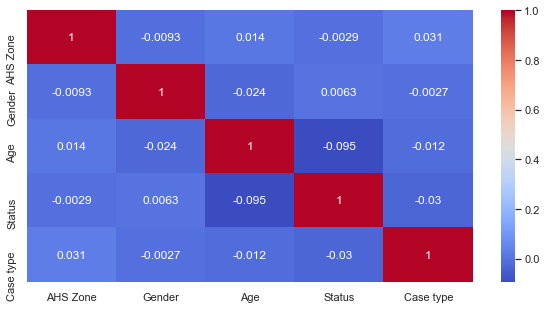

In [95]:
# Plot correlation matrix
plt.figure(figsize=(10,5))
c = df.iloc[:,2:].corr()
c
sns.heatmap(c, cmap="coolwarm",annot=True)

In [90]:
# Display the correlation matrix values
corr = df.corr()
corr

,ID,AHS Zone,Gender,Age,Status,Case type
ID,1.000000,-0.012879,0.006879,0.038080,0.067104,0.153435
AHS Zone,-0.012879,1.000000,-0.009283,0.014010,-0.002886,0.030613
Gender,0.006879,-0.009283,1.000000,-0.023502,0.006280,-0.002713
Age,0.038080,0.014010,-0.023502,1.000000,-0.095390,-0.011852
Status,0.067104,-0.002886,0.006280,-0.095390,1.000000,-0.030086
Case type,0.153435,0.030613,-0.002713,-0.011852,-0.030086,1.000000


In [91]:
# Display the first 5 rows
df.head()

,ID,Date reported,AHS Zone,Gender,Age,Status,Case type
0,1,2020-10-13,2,1,4,2,0
1,2,2020-11-08,0,1,1,2,0
2,3,2020-10-13,4,1,5,2,0
3,4,2020-11-25,0,0,9,2,0
4,5,2020-11-26,1,0,9,2,0


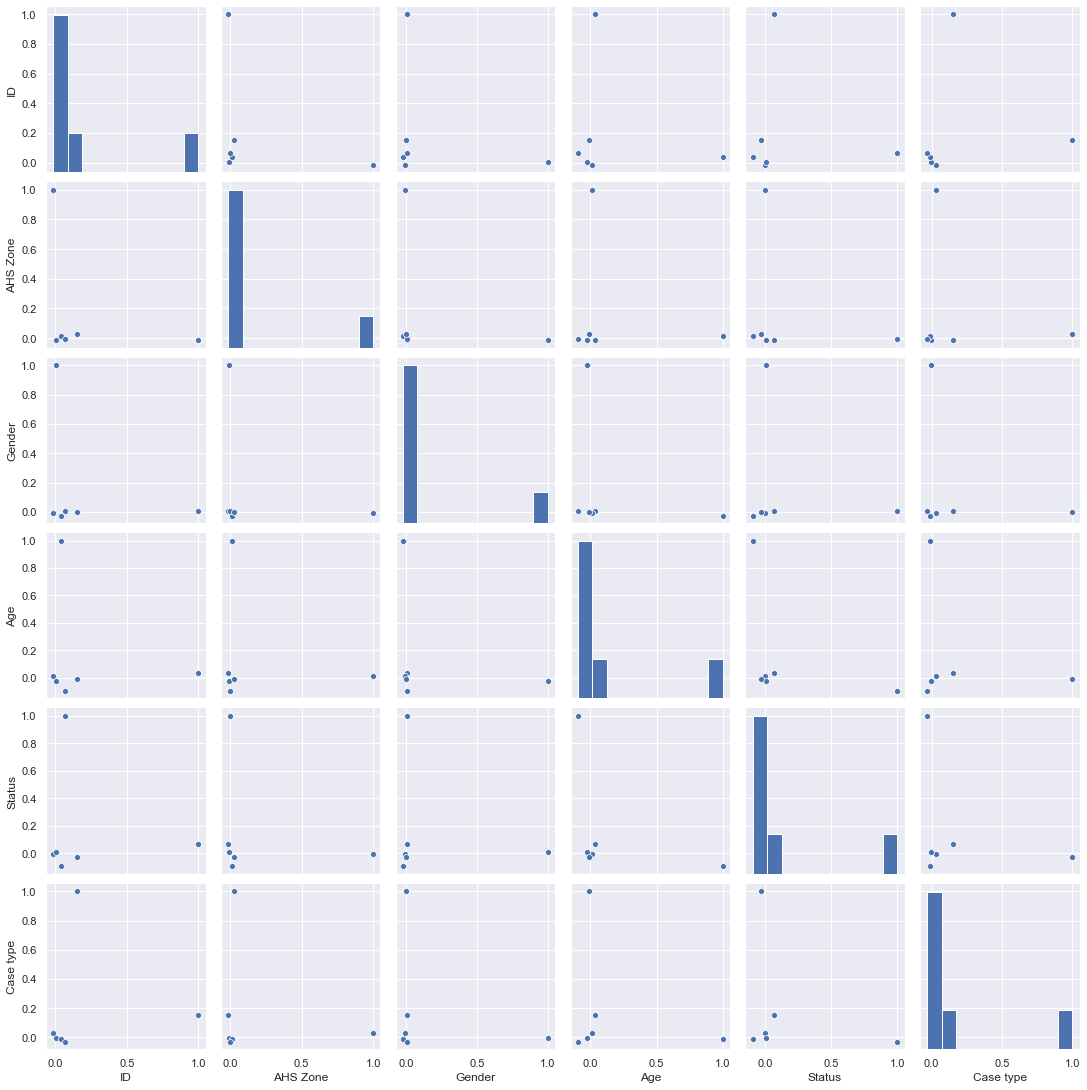

In [92]:
# Show a pair plot of the features
sns.pairplot(corr)